# PROBLEM STATEMENT

The dataset "Sample_data" in which each row represents an independent experiment and each column represents one measurement (feature) of the experiment. The first column (ref_group) defines the experimental condition.
A subset of these experiments belongs to the so called reference groups which are apparent by the group column:

reference group A: group == group_A

reference group B: group == group_B

reference group C: group == group_C

reference group D: group == group_D

reference group E: group == group_E



# AIM

Our target is to assign the ref_group "unknown" into any of the existing cluster groups or else we can check for the scope of determining a new group.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
import sklearn.cluster
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.model_selection import cross_validate


# LOADING THE DATASET

In [2]:
df =pd.read_csv(r"C:\Users\Hp\Downloads\sample_data.csv")

In [3]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

The dataset contains 10443 rows and 1490 columns. Each row represents an unique expirement result, Our target is to 
assign the ref_group "unknown" into any of the existing cluster groups or else we can check for the scope of determining a 
new group.

In [4]:
#Checking the dimension of the data
df.shape

(10443, 1490)

In [5]:
#checking the datatypes of the columns in the dataset
df.dtypes

ref_group        object
feature_1        object
feature_2       float64
feature_3       float64
feature_4       float64
                 ...   
feature_1485    float64
feature_1486    float64
feature_1487    float64
feature_1488    float64
feature_1489    float64
Length: 1490, dtype: object

The dataset contains "float64" and "object" datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Columns: 1490 entries, ref_group to feature_1489
dtypes: float64(1488), object(2)
memory usage: 118.7+ MB


The dataset contains 1488 numerical entries and 2 categorical columns.

In [7]:
#View descriptive statistics of the dataset
df.describe()

feature_2     feature_3     feature_4     feature_5     feature_6  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean       0.016426     -0.045078     -1.567157     -1.578628     -0.073357   
std        1.188721      1.037274      3.454994      3.481711      4.810338   
min      -10.257909     -8.292050    -12.730453    -12.887131     -8.859896   
25%       -0.489084     -0.693849     -1.000000     -1.000000     -0.235906   
50%       -0.025186     -0.020285     -0.133278     -0.127275     -0.109406   
75%        0.428663      0.641054      0.230179      0.234083      0.007075   
max       36.318409      4.588110     16.757234     16.846380    181.005784   

          feature_7     feature_8     feature_9    feature_10    feature_11  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean      -0.037105      0.045635      0.045635      0.045635      1.129871   
std        4.069094      1.200972      1.200972      1.200972      2.562103   
min       -7.883661     -4.430092     -4.430092     -4.430092    -16.006237   
25%       -0.252291     -0.594161     -0.594161     -0.594161     -0.349660   
50%       -0.122989     -0.080744     -0.080744     -0.080744      0.231507   
75%        0.005044      0.522803      0.522803      0.522803      1.271097   
max      171.001866     29.296527     29.296527     29.296527      7.681389   

       ...  feature_1480  feature_1481  feature_1482  feature_1483  \
count  ...  10443.000000  10443.000000  10443.000000  10443.000000   
mean   ...      0.899751      0.267664     -0.094125     -0.006678   
std    ...     18.290295      4.490595      1.873382      1.294474   
min    ...     -5.349721     -6.621495     -7.008615    -21.112857   
25%    ...     -0.111329     -0.253184     -0.507520     -0.509399   
50%    ...     -0.083272     -0.124997     -0.135762     -0.061696   
75%    ...     -0.050299     -0.000242      0.213179      0.365233   
max    ...   1454.178389    213.294729     44.016353     19.042041   

       feature_1484  feature_1485  feature_1486  feature_1487  feature_1488  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean      -0.114265      0.545133      0.045379     -0.107423     -0.017924   
std        1.182413      5.385513      2.873834      1.669608      1.276353   
min      -20.352592     -7.614988    -20.918341    -20.965860    -23.067252   
25%       -0.544068     -0.225932     -0.390944     -0.540086     -0.501286   
50%       -0.024471     -0.115340     -0.150097     -0.136831     -0.072985   
75%        0.419857     -0.007532      0.086144      0.248593      0.356540   
max       19.085651    229.282123     77.063853     31.866329     18.702250   

       feature_1489  
count  10443.000000  
mean      -0.118648  
std        1.167760  
min      -22.947341  
25%       -0.526541  
50%       -0.039149  
75%        0.373068  
max       18.676680  

[8 rows x 1488 columns]

# Visualizing Null Values

<AxesSubplot:>

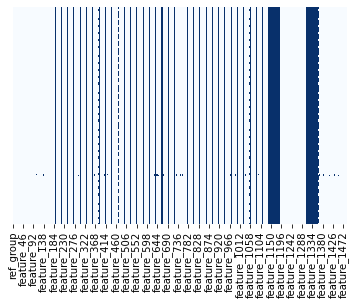

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [8]:
#Removing null values
df.dropna()


Empty DataFrame
Columns: [ref_group, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13, feature_14, feature_15, feature_16, feature_17, feature_18, feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_27, feature_28, feature_29, feature_30, feature_31, feature_32, feature_33, feature_34, feature_35, feature_36, feature_37, feature_38, feature_39, feature_40, feature_41, feature_42, feature_43, feature_44, feature_45, feature_46, feature_47, feature_48, feature_49, feature_50, feature_51, feature_52, feature_53, feature_54, feature_55, feature_56, feature_57, feature_58, feature_59, feature_60, feature_61, feature_62, feature_63, feature_64, feature_65, feature_66, feature_67, feature_68, feature_69, feature_70, feature_71, feature_72, feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_79, feature_80, feature_81, feature_82, feature_83, feature_84, feature_85, feature_86, feature_87, feature_88, feature_89, feature_90, feature_91, feature_92, feature_93, feature_94, feature_95, feature_96, feature_97, feature_98, feature_99, ...]
Index: []

[0 rows x 1490 columns]

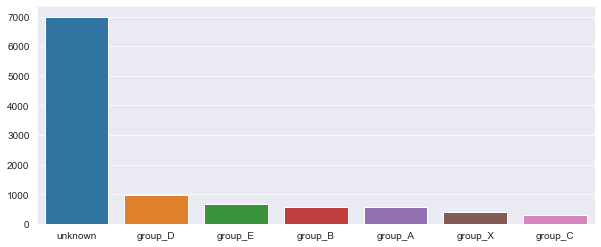

In [9]:
#Visualization of unique values in ref_group
ref= df.ref_group.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.barplot(x = ref.index, y=ref.values)
plt.show()

From the above plot, 

unknow group contains 6994 values
group_D contains 959 values
group_E  contains 670 values
group_B contains 576 values
group_A contains 574 values
group_X contains 382 values
group_C contains 288 values

Our task is to move the features in unknown category to any of the existing Groups or check for the scope of creating a new group.

In [10]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

In [11]:
print("Total categories in the feature ref_group:\n",df["ref_group"].value_counts(), "\n")
print("Total categories in the feature_1:\n", df["feature_1"].value_counts())

Total categories in the feature ref_group:
 unknown    6994
group_D     959
group_E     670
group_B     576
group_A     574
group_X     382
group_C     288
Name: ref_group, dtype: int64 

Total categories in the feature_1:
 z_score    10443
Name: feature_1, dtype: int64


In [12]:
#The "feature_1" column contains an unique value z_score and Z_score is a scaling method, hence dropping the feature_1 from the
#dataset.
df.drop(["feature_1"], axis=1, inplace=True)

# DATA PREPROCESSING / CLEANING

**1.Data Cleaning**


*Visualizing outliers using Boxplot*

In [13]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

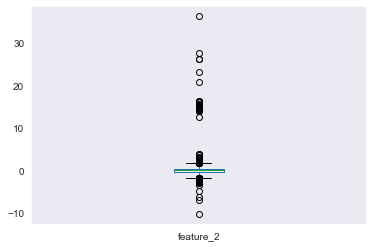

In [14]:
plot_boxplot(df, "feature_2")

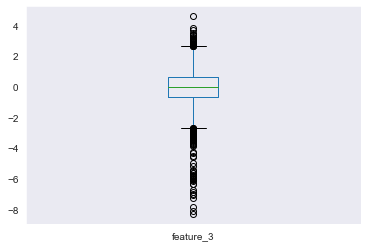

In [15]:
plot_boxplot(df, "feature_3")

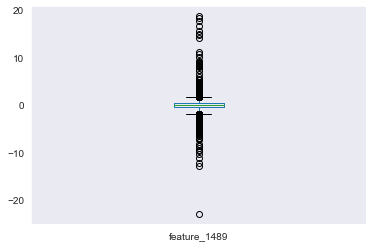

In [16]:
plot_boxplot(df, "feature_1489")

From the Boxplot it's clear that there are many outliers in the dataset.I It means that we need to standardize the given dataset.

#  OUTLIERS

In [17]:
#Detecting outliers using the descriptive statistics using interquartile ranges (IQRs)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature_2       0.917747
feature_3       1.334903
feature_4       1.230179
feature_5       1.234083
feature_6       0.242981
                  ...   
feature_1485    0.218401
feature_1486    0.477088
feature_1487    0.788679
feature_1488    0.857826
feature_1489    0.899609
Length: 1488, dtype: float64


In [18]:
df

ref_group  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       group_D  -0.855401   0.878908  -0.294277  -0.276856  -0.070858   
1       group_X  -0.514954  -0.102163   0.533037   0.518627   0.130935   
2       unknown   0.659277   1.339006  -0.828283  -0.792608  -0.154456   
3       unknown  -0.451562   0.607107  -0.077825  -0.082196   0.046872   
4       unknown  -0.180138   0.715372  -0.874969  -0.842122  -0.257817   
...         ...        ...        ...        ...        ...        ...   
10438   group_D   0.990676  -2.177556   0.996033   1.015562   0.130092   
10439   group_D   0.217427  -1.293580  -0.189877  -0.059088   1.476607   
10440   group_D   1.446129  -1.329197   0.223080   0.152475   0.891322   
10441   group_D   1.177426  -1.571178   0.190298   0.261232   1.394647   
10442   group_D   0.842133   0.779006   0.333823   0.351760   2.080907   

       feature_7  feature_8  feature_9  feature_10  ...  feature_1480  \
0      -0.128097   0.002755   0.002755    0.002755  ...     -0.045789   
1       0.056910   0.705432   0.705432    0.705432  ...     -0.022304   
2      -0.138686  -0.501680  -0.501680   -0.501680  ...     -0.053745   
3       0.065412  -0.049056  -0.049056   -0.049056  ...     -0.034710   
4      -0.186609   0.026108   0.026108    0.026108  ...     -0.082815   
...          ...        ...        ...         ...  ...           ...   
10438   0.079168   0.461550   0.461550    0.461550  ...      2.390302   
10439   0.663995  -0.113285  -0.113285   -0.113285  ...      1.656760   
10440   1.135541  -0.310881  -0.310881   -0.310881  ...      2.184652   
10441   0.240026   0.499549   0.499549    0.499549  ...      1.868905   
10442   1.942566  -0.890494  -0.890494   -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1489 columns]

**2.Dealing with Duplicate values**

In [19]:
#Checking the duplicate values
df.duplicated().sum()

118

There are 118 duplicate values in the given dataset. Hence, we have to drop those duplicate entries from the dataset.

In [20]:
#Drop duplicate values from the given dataset
df = df.drop_duplicates()

In [21]:
df

ref_group  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       group_D  -0.855401   0.878908  -0.294277  -0.276856  -0.070858   
1       group_X  -0.514954  -0.102163   0.533037   0.518627   0.130935   
2       unknown   0.659277   1.339006  -0.828283  -0.792608  -0.154456   
3       unknown  -0.451562   0.607107  -0.077825  -0.082196   0.046872   
4       unknown  -0.180138   0.715372  -0.874969  -0.842122  -0.257817   
...         ...        ...        ...        ...        ...        ...   
10438   group_D   0.990676  -2.177556   0.996033   1.015562   0.130092   
10439   group_D   0.217427  -1.293580  -0.189877  -0.059088   1.476607   
10440   group_D   1.446129  -1.329197   0.223080   0.152475   0.891322   
10441   group_D   1.177426  -1.571178   0.190298   0.261232   1.394647   
10442   group_D   0.842133   0.779006   0.333823   0.351760   2.080907   

       feature_7  feature_8  feature_9  feature_10  ...  feature_1480  \
0      -0.128097   0.002755   0.002755    0.002755  ...     -0.045789   
1       0.056910   0.705432   0.705432    0.705432  ...     -0.022304   
2      -0.138686  -0.501680  -0.501680   -0.501680  ...     -0.053745   
3       0.065412  -0.049056  -0.049056   -0.049056  ...     -0.034710   
4      -0.186609   0.026108   0.026108    0.026108  ...     -0.082815   
...          ...        ...        ...         ...  ...           ...   
10438   0.079168   0.461550   0.461550    0.461550  ...      2.390302   
10439   0.663995  -0.113285  -0.113285   -0.113285  ...      1.656760   
10440   1.135541  -0.310881  -0.310881   -0.310881  ...      2.184652   
10441   0.240026   0.499549   0.499549    0.499549  ...      1.868905   
10442   1.942566  -0.890494  -0.890494   -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10325 rows x 1489 columns]

Now we have successfully removed duplicate values from our dataset. At present our dataset contains 10325 rows × 1489 columns.

In [22]:
#Defined a new variable "y" for storing the values in the column "ref_group" inorder to perform classification later.
y =df["ref_group"] # Created target


In [23]:
# Inorder to keep the numeric columns for further analysis we are going to remove the categorical column "ref_group" from our dataset
df.drop(["ref_group"], axis=1, inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**3.Replacing Missing values with NaN**

The given dataset contains missing values, inorder to make further analysis we need to remove those missing values. 
We are using "replace" method to replace blank spaces with NaN. Later we use a different method for removing Null values.

In [24]:
#Replacing blank spaces
data_new1 = df.copy()   # Create duplicate of data
data_new1 = data_new1.replace(r'^s*$', float('NaN'), regex = True)  # Replace blanks by NaN
print(data_new1)            

       feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0      -0.855401   0.878908  -0.294277  -0.276856  -0.070858  -0.128097   
1      -0.514954  -0.102163   0.533037   0.518627   0.130935   0.056910   
2       0.659277   1.339006  -0.828283  -0.792608  -0.154456  -0.138686   
3      -0.451562   0.607107  -0.077825  -0.082196   0.046872   0.065412   
4      -0.180138   0.715372  -0.874969  -0.842122  -0.257817  -0.186609   
...          ...        ...        ...        ...        ...        ...   
10438   0.990676  -2.177556   0.996033   1.015562   0.130092   0.079168   
10439   0.217427  -1.293580  -0.189877  -0.059088   1.476607   0.663995   
10440   1.446129  -1.329197   0.223080   0.152475   0.891322   1.135541   
10441   1.177426  -1.571178   0.190298   0.261232   1.394647   0.240026   
10442   0.842133   0.779006   0.333823   0.351760   2.080907   1.942566   

       feature_8  feature_9  feature_10  feature_11  ...  feature_1480  \
0       0.002755   0.0027

In [25]:
data_new1

feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0      -0.855401   0.878908  -0.294277  -0.276856  -0.070858  -0.128097   
1      -0.514954  -0.102163   0.533037   0.518627   0.130935   0.056910   
2       0.659277   1.339006  -0.828283  -0.792608  -0.154456  -0.138686   
3      -0.451562   0.607107  -0.077825  -0.082196   0.046872   0.065412   
4      -0.180138   0.715372  -0.874969  -0.842122  -0.257817  -0.186609   
...          ...        ...        ...        ...        ...        ...   
10438   0.990676  -2.177556   0.996033   1.015562   0.130092   0.079168   
10439   0.217427  -1.293580  -0.189877  -0.059088   1.476607   0.663995   
10440   1.446129  -1.329197   0.223080   0.152475   0.891322   1.135541   
10441   1.177426  -1.571178   0.190298   0.261232   1.394647   0.240026   
10442   0.842133   0.779006   0.333823   0.351760   2.080907   1.942566   

       feature_8  feature_9  feature_10  feature_11  ...  feature_1480  \
0       0.002755   0.002755    0.002755    0.649031  ...     -0.045789   
1       0.705432   0.705432    0.705432   -0.165675  ...     -0.022304   
2      -0.501680  -0.501680   -0.501680    1.309479  ...     -0.053745   
3      -0.049056  -0.049056   -0.049056    0.657141  ...     -0.034710   
4       0.026108   0.026108    0.026108    1.342965  ...     -0.082815   
...          ...        ...         ...         ...  ...           ...   
10438   0.461550   0.461550    0.461550   -0.333856  ...      2.390302   
10439  -0.113285  -0.113285   -0.113285   -1.408207  ...      1.656760   
10440  -0.310881  -0.310881   -0.310881   -2.148595  ...      2.184652   
10441   0.499549   0.499549    0.499549   -0.226187  ...      1.868905   
10442  -0.890494  -0.890494   -0.890494    0.124688  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10325 rows x 1488 columns]

In [26]:
#Checking for infinite values
count = np.isinf(data_new1).values.sum()
count

8

There are 8 infinite values in the given dataset. For further analysis we need to either remove the infinite values or 
replace it with finite values using SimpleImputer.

# Using SimpleImputer for solving Null Values and Infinite values

In [27]:
from sklearn.impute import SimpleImputer

data_new1.replace([np.inf, -np.inf], np.nan, inplace=True)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

imputer = imp_mean.fit(data_new1)

data_new1 = imp_mean.transform(data_new1)

print(data_new1)

[[-0.85540142  0.87890824 -0.29427662 ...  0.44070094  0.05274
   0.13654319]
 [-0.5149539  -0.10216264  0.53303729 ... -0.05569738 -0.26646862
  -0.19913639]
 [ 0.6592769   1.33900585 -0.82828313 ...  1.75327164  1.57599219
   1.46291354]
 ...
 [ 1.44612914 -1.32919714  0.22308029 ...  0.21317449  0.13074358
  -0.46338996]
 [ 1.17742556 -1.57117769  0.19029808 ... -0.68789599 -0.81648335
  -1.14405224]
 [ 0.84213253  0.77900559  0.33382331 ...  0.38396213  0.28164862
  -0.06151404]]


In this process, we replaced infinite values with nan and the null values are replaced with the median of the respective columns. We have chosen startegy "Median" since there are many outliers in our dataset.

# DATA ENGINEERING

**1.Scaling**

Units of the features are not defined, so it's best practise to standardize the data by scaling. We are using standardscaler
from SKlearn for standardizing the numerical data.

In [28]:
scaler = StandardScaler()
scaler.fit(data_new1)
scaled_ds = pd.DataFrame(scaler.transform(data_new1))
print("All features are now scaled")

All features are now scaled


In [30]:
#For clustering we do need a target vector
x= scaled_ds  #numeric data
np.unique(y)#label



array(['group_A', 'group_B', 'group_C', 'group_D', 'group_E', 'group_X',
       'unknown'], dtype=object)

**2.Principal Component Analysis**

 Dimensionality reduction technique is used  to reduce the size of the data with high number of dimensions to 
lesser number of dimension without the loss of information. Here we are going to apply Principal Component Analysis
where we follow the below mentioned steps:

    create a covariance matrix 
    
    calculate Eigenvectors for the matrix
    
    Eigenvvectors are those corresponsing to large Eigen values, hence a large proportion of varianace of original data
    is reconstructed. There might be small data loss as well. Nevertheless, the remaining eigen vectors should retains the 
    most important variances.


In [31]:
#Create a Covariance matrix
covar_matrix = PCA(n_components = 1223 ) 

In [32]:
#Calculating Eigenvalues
covar_matrix.fit(x)

#calculate variance ratios
variance = covar_matrix.explained_variance_ratio_

In [33]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

#cumulative sum of variance explained with [n] features
var

array([23. , 42. , 51.8, ..., 98.3, 98.3, 98.3])

In [34]:
var[90], var[18]

(98.29999999999981, 90.0)

From the cumilative sum of variance (above array) we see that the first feature explains roughly 23% of the variance within our data set while the first two explain 42% and so on. Hence, it's very clear that we can obtain 90% of the variance by implementing the 18 features of the given dataset.

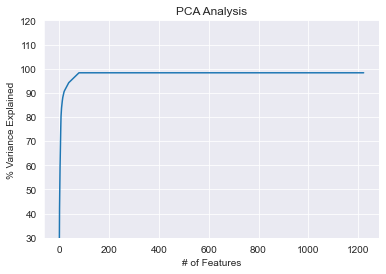

In [35]:

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,120)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

From the above plot, it's clear that we need to choose 18 features to get 90 % Variance and for getting 98% variance we need to 
choose 90 features.

In [36]:
#Define 18 features for PCA
pca=PCA(n_components=18)
reduced=pca.fit_transform(x)


**3.KMeans For Clustering**

We are going to train our model with reduced PCA dimension.

In [37]:
model = sklearn.cluster.KMeans(n_clusters=6) # chosen a random number of clusters
model.fit(reduced)
y_predict = model.predict(reduced)
print(model.inertia_)
print(model.labels_)
print(model.cluster_centers_)

5013274.556593463
[0 0 3 ... 3 0 3]
[[-2.86532964e+00  3.44643557e+00  5.57858324e+00 -3.93436210e+00
  -2.63142919e+00 -1.69009836e+00  7.50259740e-02  9.08872285e-02
   1.81234794e-02  3.50172522e-01  5.05958984e-02 -1.02041564e-02
  -4.39330224e-01 -1.95481603e-01 -8.73791511e-03  6.80207243e-02
   1.22344521e-02  2.99193255e-01]
 [ 4.31087507e+01 -2.28464952e+00 -8.24454941e+00 -6.06646428e+00
   1.95161269e+00  1.83328502e+00  3.30371044e+00 -1.61922263e+01
  -9.82240572e-01 -1.01721527e-01 -9.40689936e-02 -3.77476894e-02
  -7.31553921e-01  4.46933270e-01 -9.28118985e-02  4.97501418e-01
  -1.30635029e-01 -6.74494471e-01]
 [ 3.85158554e+02  1.80150799e+02  1.94433299e+02  1.74791583e+02
   4.84119749e+01  5.49436728e+01  1.69491791e+02  1.23191946e+02
   1.42632515e+01  3.46392770e+01 -1.82530081e+01  6.98024072e+00
   4.08352930e-01 -2.52155709e+00 -6.64381999e+00  2.10909043e+01
  -5.34595774e+00 -1.01364974e+01]
 [-6.67749664e+00  6.02777961e+00 -5.30396361e+00  4.93750180e+00
 

In [38]:
df["cluster_id"] = model.labels_

<ipython-input-38-88e891da093f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_id"] = model.labels_


In [40]:
cluster_labels =model.labels_
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['group_A', 'group_B', 'group_C ', 'group_D ', 'group_E', 'group_X', "group_unknown1", "total" ]
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['Total']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  cluster6  \
group_A                0         0         4         0         6       564   
group_B                0       576         0         0         0         0   
group_C                2         0         0         0         0       286   
group_D              521         0         0       431         0         0   
group_E              158         0         0       216         0       290   
group_X              178         0         0       198         0         0   
group_unknown1      3839        29         0      3027         0         0   
total               4698       605         4      3872         6      1140   

                Total  
group_A           574  
group_B           576  
group_C           288  
group_D           952  
group_E           664  
group_X           376  
group_unknown1   6895  
total           10325

# Identifying The Number Of Clusters

In [41]:
k_list = []
elbow_scores = []

for k in range(2, 10):
    k_list.append(k)
    model = sklearn.cluster.KMeans(n_clusters=k)
    model.fit(reduced)
    es = model.inertia_
    elbow_scores.append(es)

In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=k_list, y=elbow_scores))
fig.show()

From the above plot it's clear that there are 6 or 7 clusters

In [43]:
model = sklearn.cluster.KMeans(n_clusters=7)
clusters = model.fit_predict(reduced)
print(model.inertia_)
print(model.labels_)
print(model.cluster_centers_)

4705628.834495602
[2 6 0 ... 0 6 2]
[[-7.01151314e+00  9.25748188e+00 -3.58526415e+00  1.19047115e+01
   3.95525660e+00  4.33680318e+00 -4.98015254e+00 -2.18734652e+00
  -1.61589308e+00 -3.31197850e-01 -2.81948938e-01 -8.53275505e-02
   8.29630593e-01  2.22335484e-01  4.05023988e-02  2.71686703e-02
  -5.09603368e-02 -1.63585883e-01]
 [ 3.85158554e+02  1.80150799e+02  1.94433299e+02  1.74791583e+02
   4.84119749e+01  5.49436728e+01  1.69491791e+02  1.23191946e+02
   1.42632515e+01  3.46392770e+01 -1.82530081e+01  6.98024072e+00
   4.08352930e-01 -2.52155709e+00 -6.64381999e+00  2.10909043e+01
  -5.34595774e+00 -1.01364974e+01]
 [-5.75752981e+00  3.64299572e+00 -4.00785355e+00 -1.35803968e+00
   9.53202358e-01 -1.97655792e+00  3.41576303e+00  1.75761345e+00
   1.89523551e-01  1.32028820e-01  2.77416207e-01  2.06380544e-01
   1.73349718e-02 -8.09895687e-02  6.24221229e-02 -8.17290952e-02
   1.11144336e-01  5.99278772e-02]
 [ 4.30829319e+01 -2.37285685e+00 -8.42139013e+00 -6.10793820e+00
 

In [44]:
x["label"] = clusters

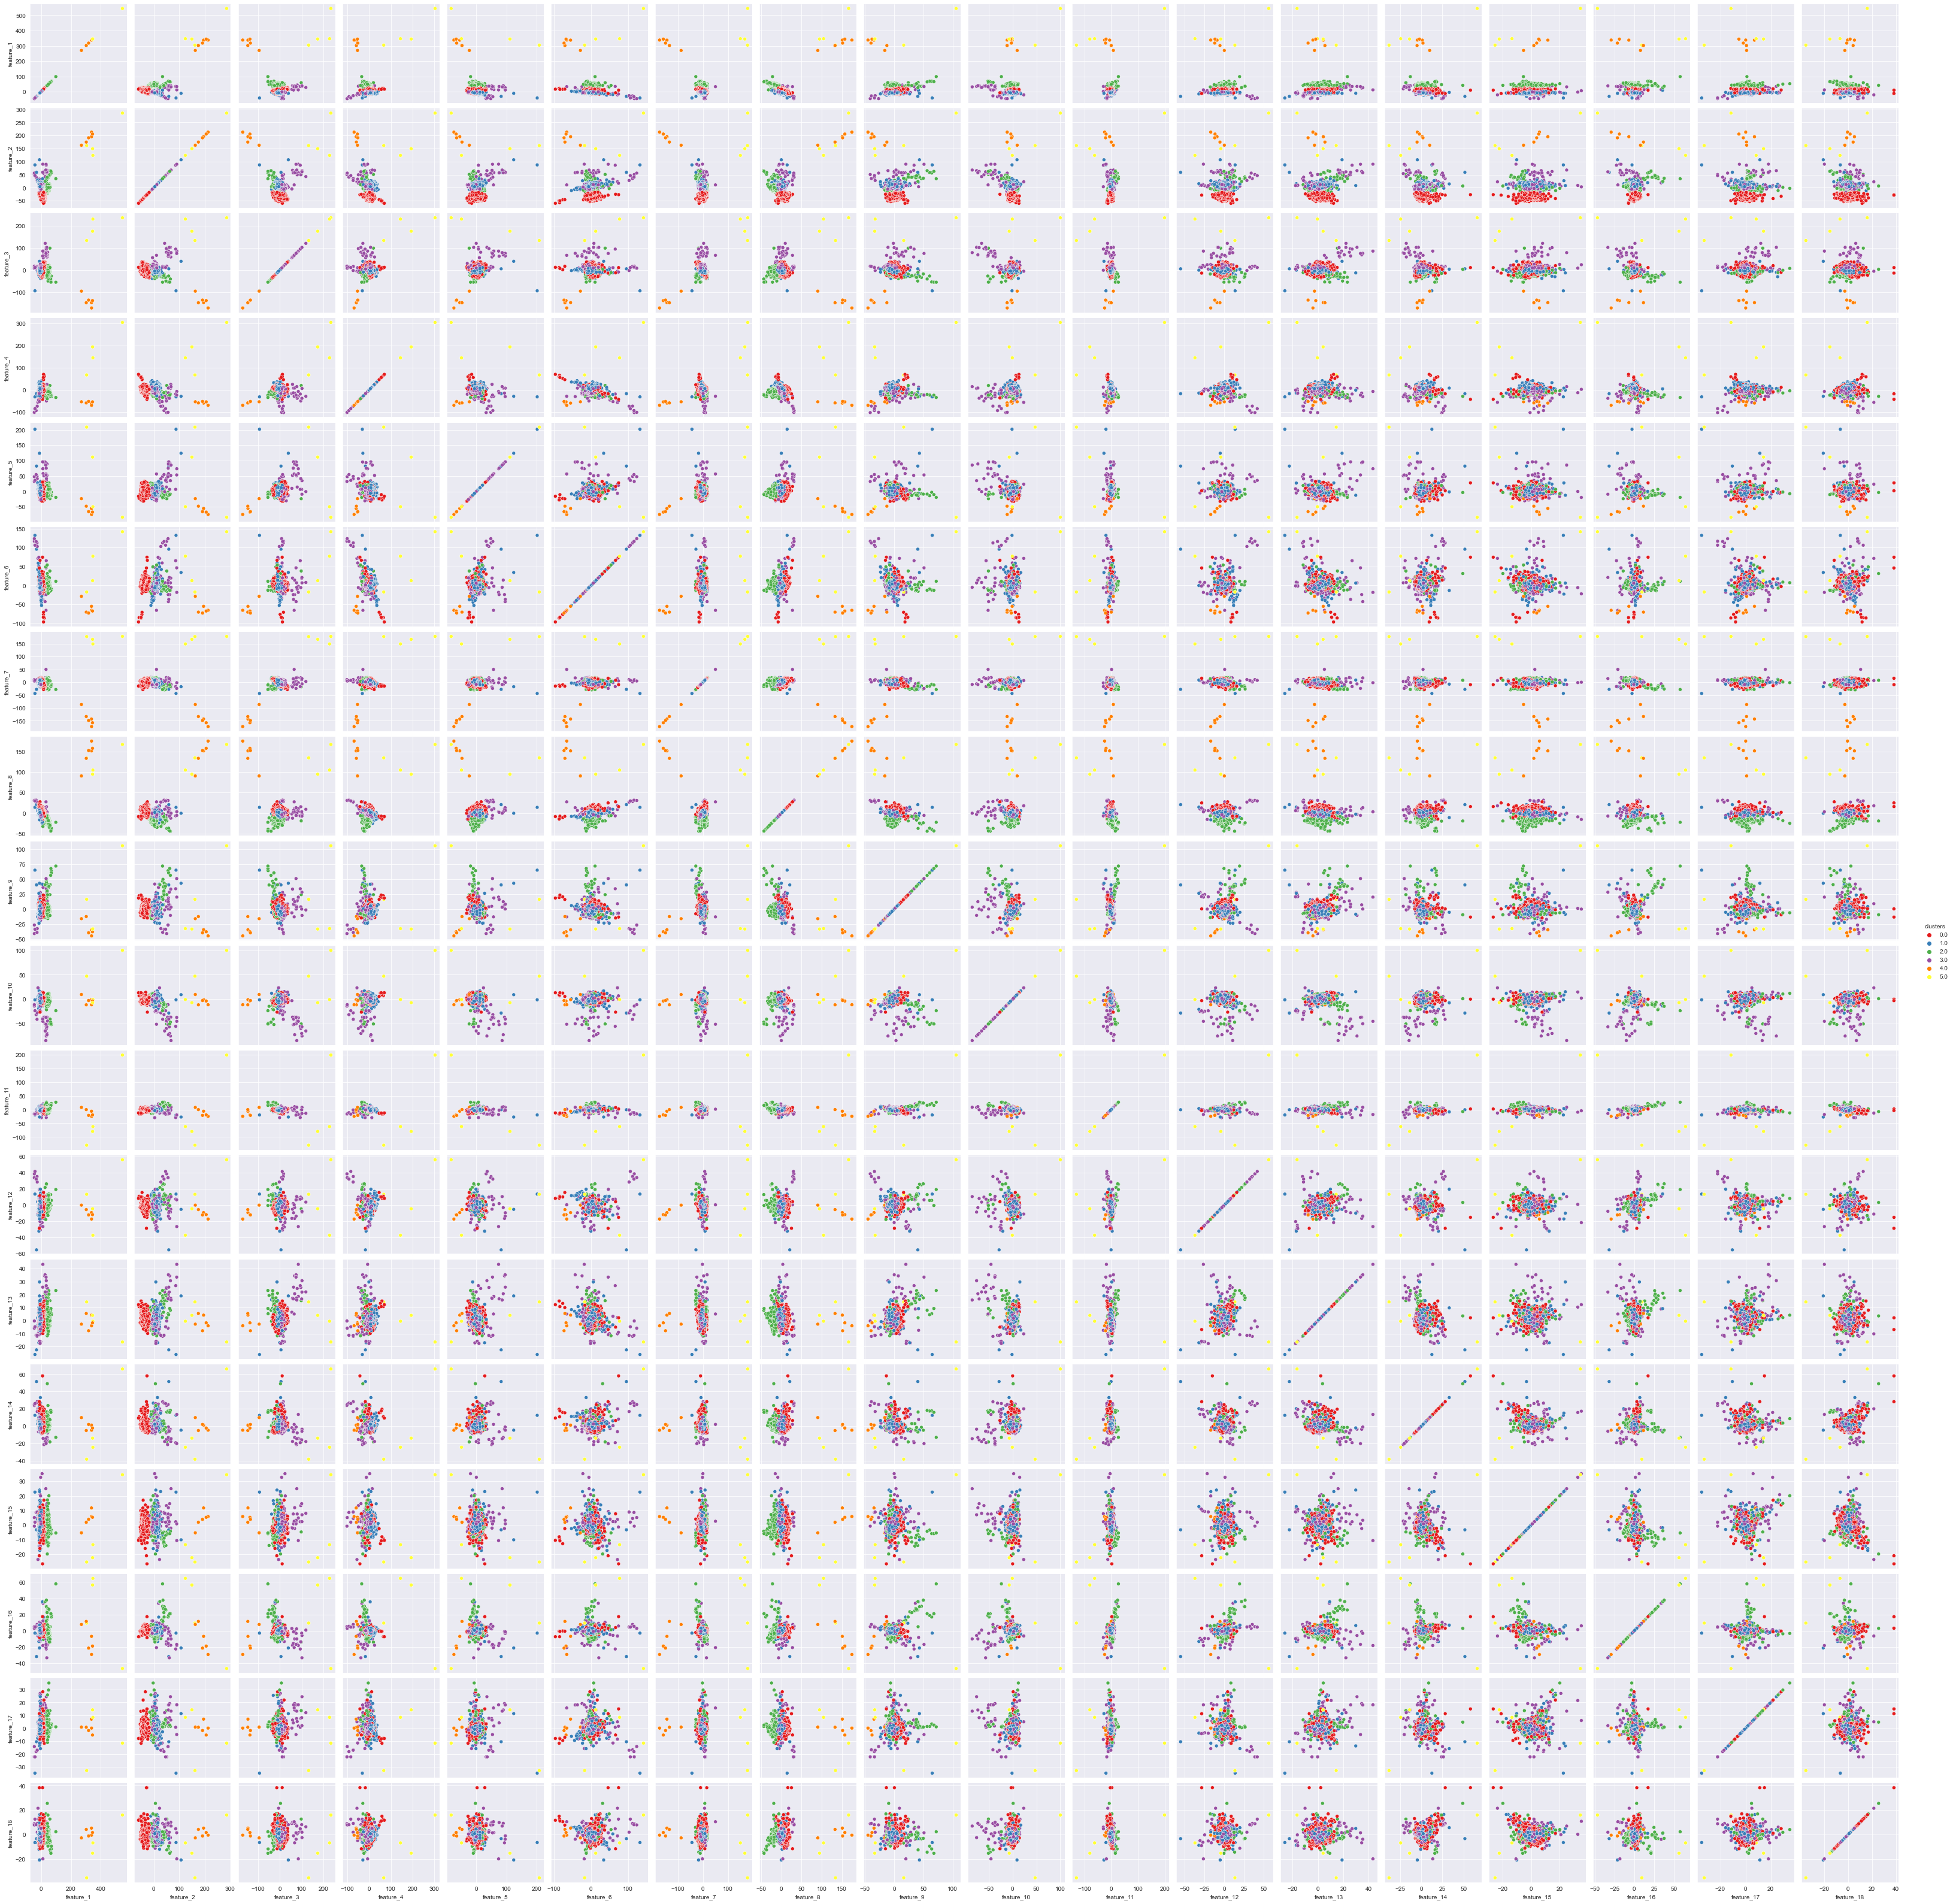

In [44]:
# PCA with 18 features
pca=PCA(n_components=18)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5', 'feature_6', 'feature_7', 'feature_8',
                                                                      'feature_9', 'feature_10', 'feature_11', 'feature_12',
                                                                      'feature_13', 'feature_14', 'feature_15', 'feature_16',
                                                                       'feature_17', 'feature_18','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

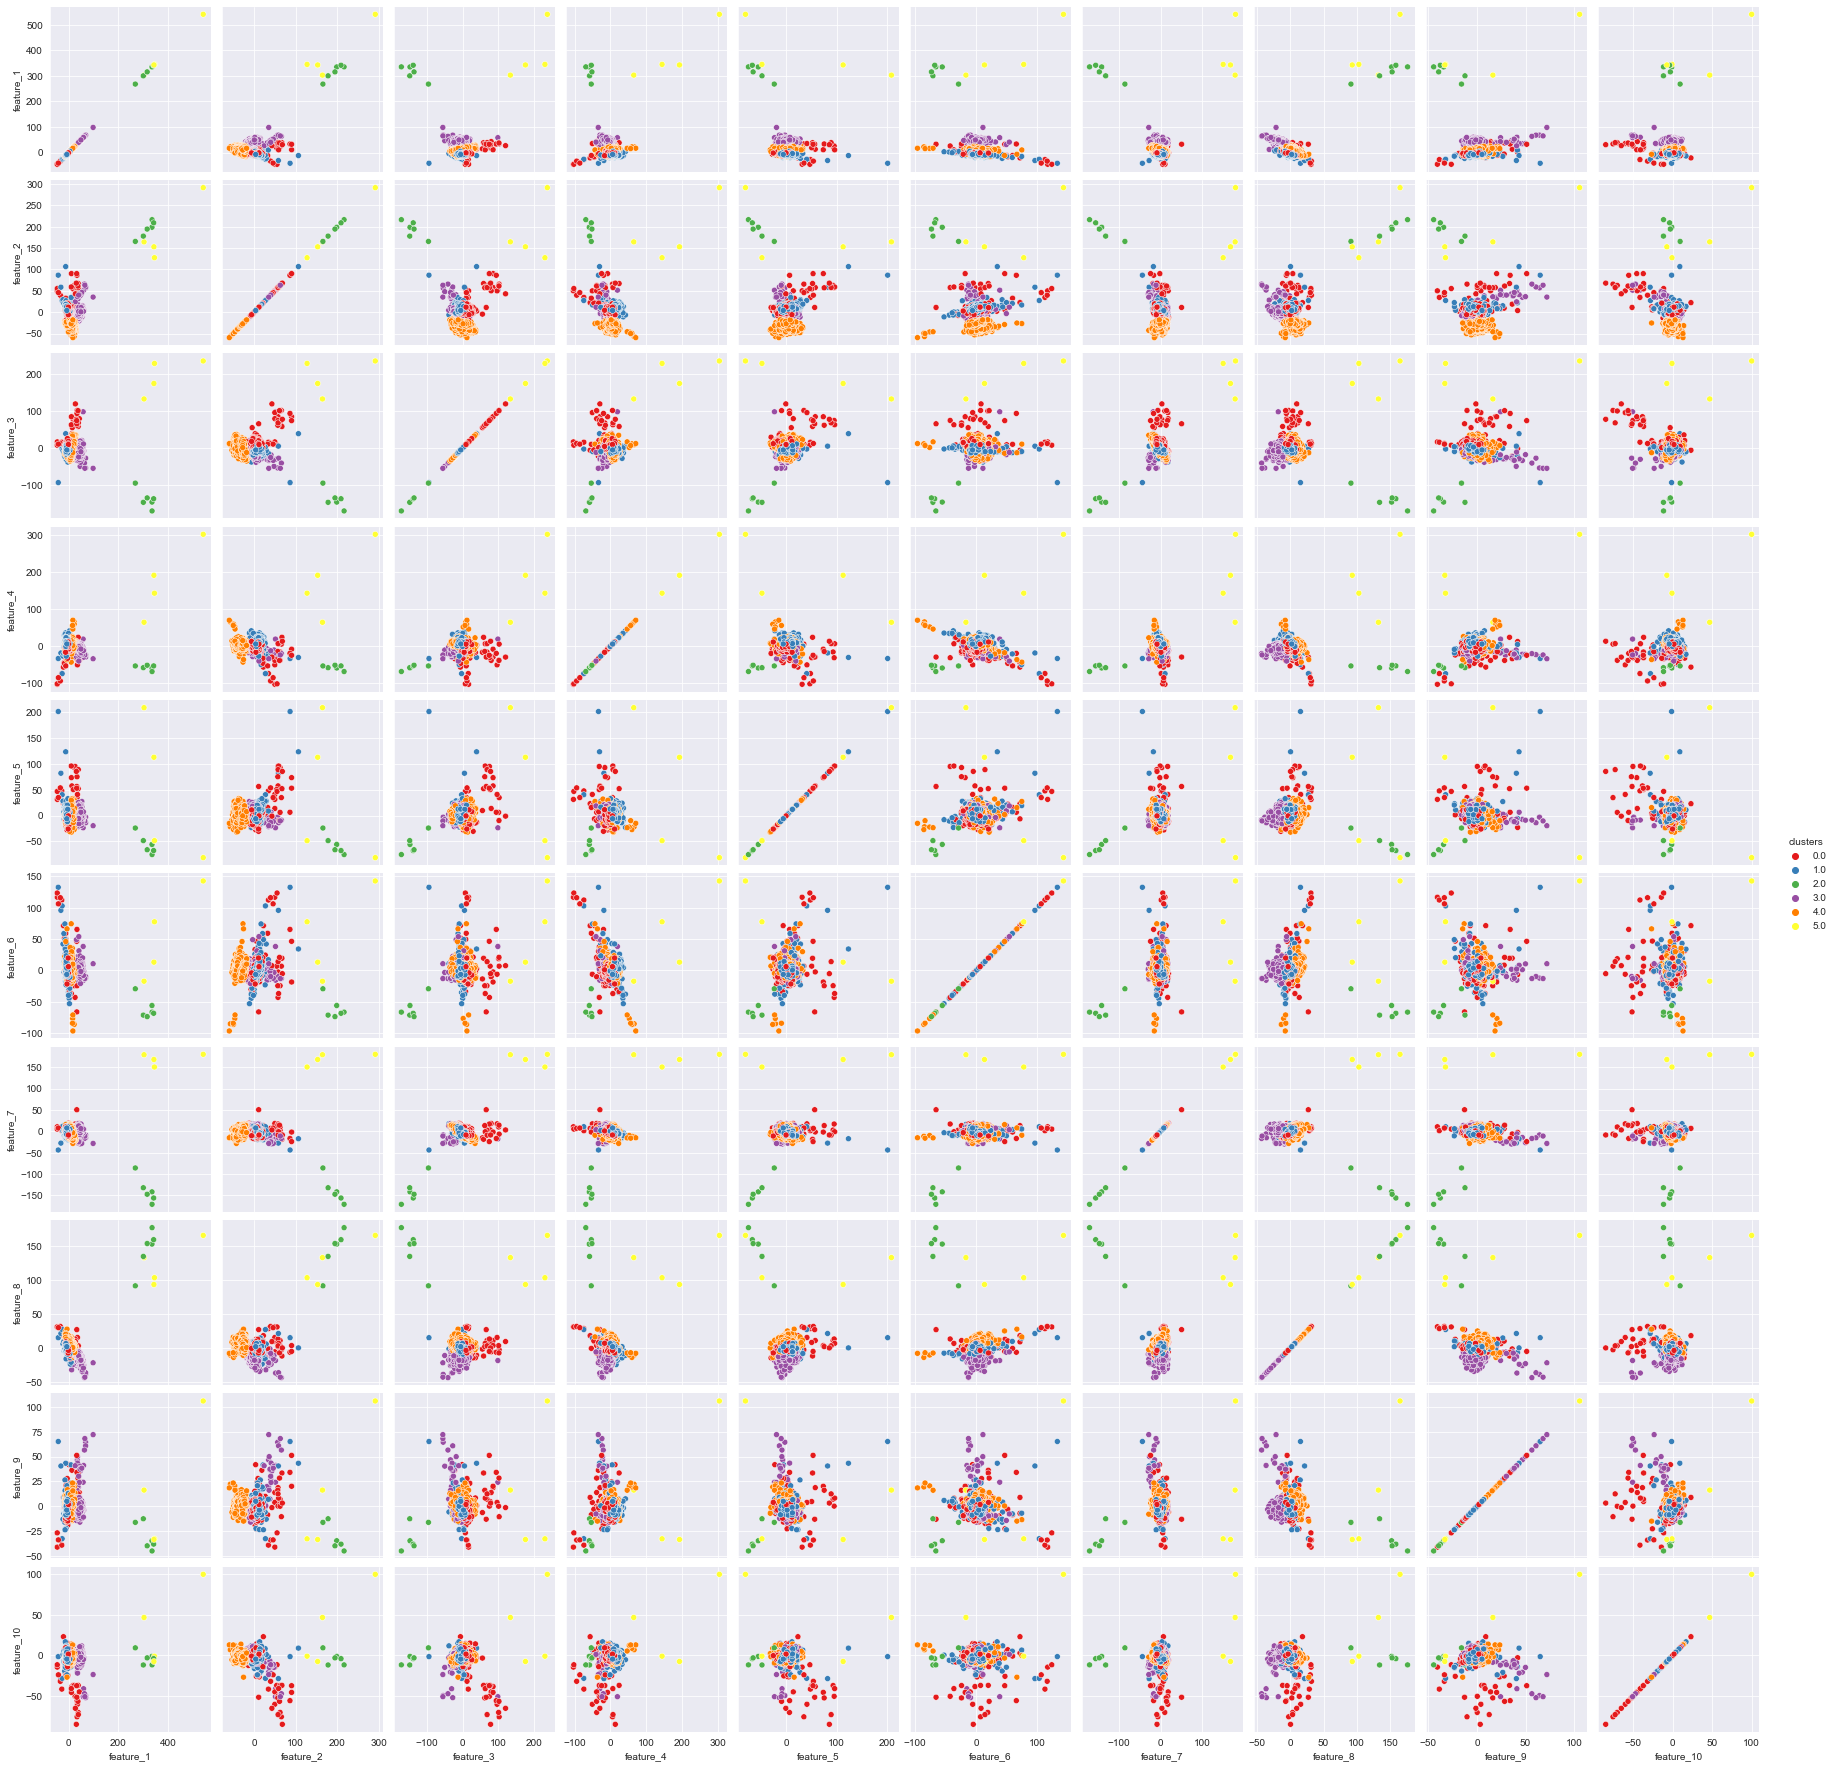

In [148]:
#PCA with 10 features
pca=PCA(n_components=10)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5', 'feature_6', 'feature_7', 'feature_8',
                                                                      'feature_9', 'feature_10','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

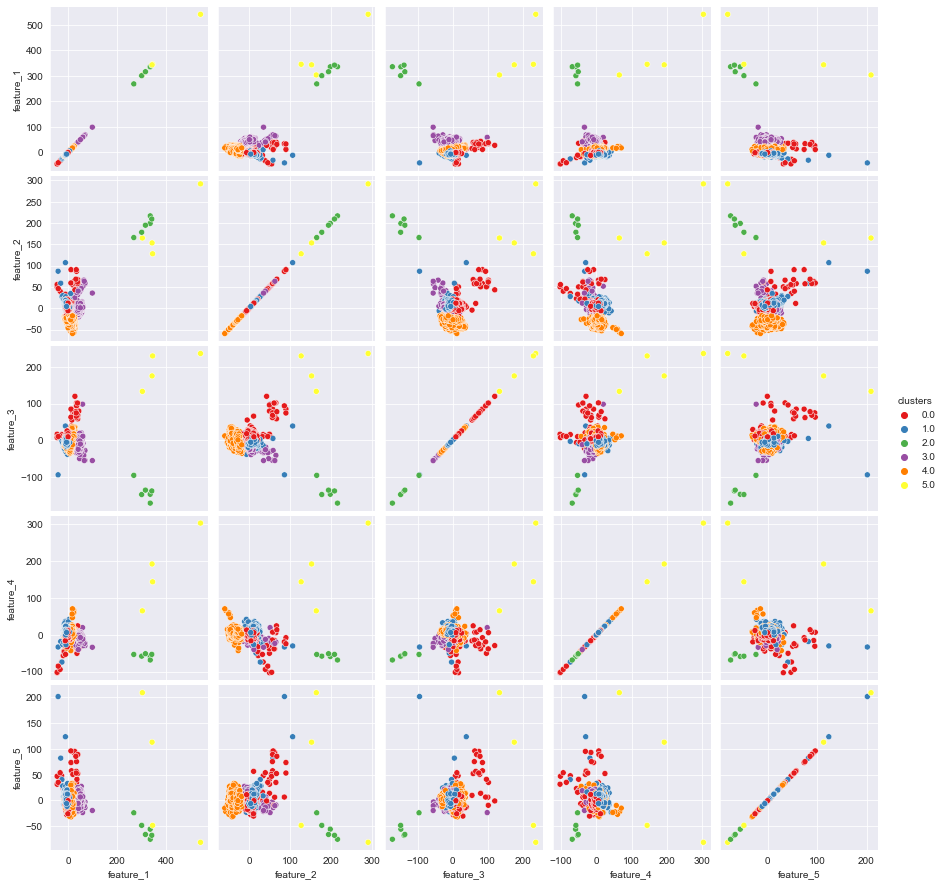

In [149]:
#PCA with 5 features
pca=PCA(n_components= 5)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

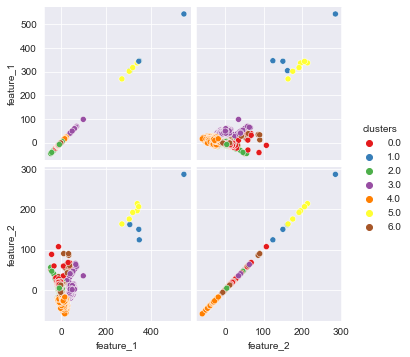

In [45]:
#PCA with 2 features
pca=PCA(n_components=2)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

# T_SNE Projection

Since the dataset has more number of outliers, T_SNE can handle outliers better than PCA. Therefore, I used T_SNE to identify 
cluster and visualize my dataset.

Reference link:
https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/

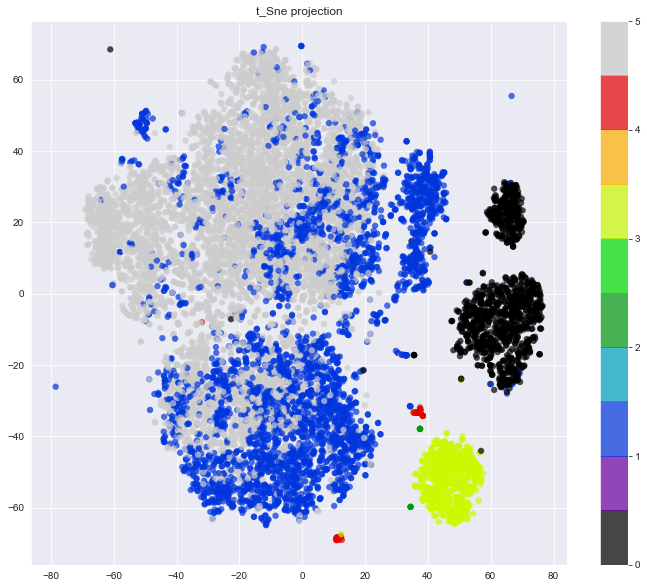

In [196]:

from sklearn.manifold import TSNE
tsne = TSNE(random_state=40)

X_tsne = tsne.fit_transform(x)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t_Sne projection');

In [46]:
# Final overview after clustering analysis
cluster_labels =model.labels_
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['group_A', 'group_B', 'group_C ', 'group_D ', 'group_E', 'group_X', "group_unknown1","total" ]
tab.columns = ['cluster' + str(i + 1) for i in range(7)] + ['Total']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  cluster6  \
group_A                0         4         0         0       564         6   
group_B                0         0         0       576         0         0   
group_C                0         0         2         0       285         0   
group_D              220         0       376         0         0         0   
group_E               70         0       217         0       288         0   
group_X               75         0       187         0         0         0   
group_unknown1      1048         0      3161        28         0         0   
total               1413         4      3943       604      1137         6   

                cluster7  Total  
group_A                0    574  
group_B                0    576  
group_C                1    288  
group_D              356    952  
group_E               89    664  
group_X              114    376  
group_unknown1      2658   6895  
total               3218  10325

# Conclusion for clustering

From the above analysis,the following are my interpretations:

The given dataset forms a total of 6 clusters. Each group forms multiple clusters. Let's look at the maximum percentage of features in a group that is assigned to a single cluster; we use this simple metric to understand how groups are separated while clustering.

* In the case of Group_A, it forms 2 clusters: cluster 3 and cluster 4, the distribution of cluster is:
cluster 3: 564
cluster 4: 10
then such share will be 564/574 =0.98


* In the case of Group_B, it forms 1 cluster: cluster 4, the distribution of cluster is:
cluster 4: 576
then such share will be 576/576 = 1.0

* In the case of Group_c, it forms 2 clusters: cluster1 and cluster5. The distribution of cluster is cluster 1: 2
cluster 5: 286
then such share will be 280/288 = 0.99


* In the case of Group_D, it forms 2 clusters: cluster1 and cluster5; the distribution of cluster is cluster 1: 543
cluster 5: 409
then such share will be 543/952 = 0.57


* In the case of Group_E, it forms 4 clusters: cluster1 and cluster2,cluster3, and cluster5 the distribution of cluster is cluster 1: 374
cluster 2: 1
cluster 3 288
cluster 5: 1
then such share will be 374/664 = 0.56


* In the case of Group_X, it forms 2 clusters: cluster1 and cluster5; the distribution of cluster is cluster 1: 188
cluster 5: 188
then such share will be 188/376 = 0.50


* In the case of group_unknown, it forms 5 clusters: cluster 1: 4235
cluster 2:2
cluster 3:1
cluster 4:2613
cluster 5:44
then such share will be 4235/6895 = 0.61


From the results, KMeans is differentiating features very well for GroupA, GroupB, and GroupC. The clustering analysis is concluded here and now let's focus on the classification of the unknown group.

# Classification

In this process we need to classify the features labeled under " unknown" to any of the existing group, here we are using Support Vector Machine Algorithm for classification.

In [47]:
#Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X = reduced
Y=y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=42)

In [48]:
#Standardizing the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**1.SVM Classification**

In [49]:
from sklearn.svm import SVC
#Define parameters
parameters_grid = {
    "kernel": ["rbf"], 
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001]
}

#Define Grid search
model_2 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                              parameters_grid,
                                              scoring="accuracy",
                                              cv=5, verbose=3)
#Fit the model to data
model_2.fit(X_train, Y_train)

#Generate accuracy and best hyperparameters
print("Accuracy of best SVM classfier = {:.2f}".format(model_2.best_score_))
print("Best found hyperparameters of SVM classifier = {}".format(model_2.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.6s
[CV 2/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV 3/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV 4/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV 5/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV 1/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 2/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 3/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 4/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 5/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 1/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   1.4s
[CV 2/5] END ................C=0.001, gamma=0.0

In [56]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=17)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [57]:
#Importing GridSearch for hyperparameter tunning to get best accuracy for our model
from sklearn.model_selection import GridSearchCV
best_svc = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc.fit(X_train_scaled, Y_train)
best_svc.predict(X_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarni

array(['unknown', 'group_C', 'group_C', ..., 'group_E', 'unknown',
       'unknown'], dtype=object)

In [56]:
#Finding the best parameter and accuracy of our model
best_svc.best_params_, best_svc.best_score_

({'C': 1}, 0.8410128684101288)

**2.Random Forest Classifier**

In [98]:
from sklearn.ensemble import RandomForestClassifier
parameters_grid = {
    "criterion":["gini", "entropy"],
    "n_estimators":range(50, 260, 50)
}
model_1 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(),
                                               parameters_grid, 
                                               scoring='accuracy',
                                               cv=5,
                                               n_jobs=-1)
model_1.fit(X_train, Y_train) 
model_1.predict(X_train)

print("Accuracy of best Random Forest Classifier= {:.2f}".format(model_1.best_score_))
print("Best found hyperparameters Of Random Forest classifier= {}"
      .format(model_1.best_params_))

Accuracy of best Random Forest Classifier= 0.82
Best found hyperparameters Of Random Forest classifier= {'criterion': 'entropy', 'n_estimators': 100}


**3.GradientBoostingClassifier**

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
parameters_grid = {
    "learning_rate":[0.01, 0.1, 0.2],
    "n_estimators": range(50, 260, 50),
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(),
                                               parameters_grid, 
                                               scoring='accuracy',
                                               cv=5,
                                               n_jobs=-1)
model_2.fit(X_train, Y_train) 
model_2.predict(X_train)
print("Accuracy of best Gradient Boosting= {:.2f}".format(model_2.best_score_))
print("Best found hyperparameters Of Gradient Boosting= {}"
      .format(model_2.best_params_))

Accuracy of best Gradient Boosting= 0.83
Best found hyperparameters Of Gradient Boosting= {'learning_rate': 0.01, 'n_estimators': 250}


**4.Logistic regression**

In [191]:
from sklearn.linear_model import LogisticRegression
#create object model
model = LogisticRegression()

#define the parameters
parameters_grid = parameters_grid = [    
    {"penalty": ["l2"],"C": [100, 10, 1.0, 0.1, 0.01],
     "solver": ["lbfgs","newton-cg","liblinear"],
     "max_iter": [100, 1000,2500, 5000]
    }
]
#definining Gridsearch
model_6 = GridSearchCV(model, param_grid=parameters_grid,
                       cv=3, verbose=True, n_jobs=-1)

#Fit model to data
model_6.fit(X_train, Y_train)
model_6.predict(X_train)

#Generate accuracy and best Hperparameters 
print("Accuracy of best logistic regression classfier= {:.2f}"
     .format(model_2.best_score_))
print("Best found hyperparameters of logistic regression classifier= {}"
      .format(model_2.best_params_))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy of best logistic regression classfier= 0.83
Best found hyperparameters of logistic regression classifier= {'learning_rate': 0.01, 'n_estimators': 250}


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Testing the best Model

In [58]:
Y_predicted = best_svc.predict(X_test_scaled)
accuracy = sklearn.metrics.accuracy_score(Y_test, Y_predicted)
Y_predicted

array(['group_C', 'unknown', 'group_E', ..., 'unknown', 'unknown',
       'unknown'], dtype=object)

# Classification Results

In [65]:
#Using crosstab to describe how the model has classified the values in unknown category (group_unknown1)
tab = pd.crosstab(Y_test, Y_predicted, margins=True)
tab.index = ['group_A', 'group_B', 'group_C ', 'group_E', 'group_D', 'group_X', "group_unknown1", 'total' ]
tab.columns = ['group_A', 'group_B', 'group_C ', 'group_D','group_E', 'group_X' ]
tab

group_A  group_B  group_C   group_D  group_E  group_X
group_A             164        0         0        1        0      165
group_B               0      186         0        0        0      186
group_C              23        0        60        1        0       84
group_E               0        0         0        2      276      278
group_D               1        1         0      157       37      196
group_X               0        0         0        0      113      113
group_unknown1        0        0         1       17     2058     2076
total               188      187        61      178     2484     3098

As per the current results of our Pipeline, we found that the "objects" in the unknown category belong to "Group_E" and we found an additional cluster"Group_X" which doesnot belong to this category and we can ignore it. We used the SVM classification method to classify the objects in the unknown category and obtained an accuracy of 80%, which is fair enough when we consider the fact that there are many outliers in the given dataset. 


# SUMMARY

We initially did data cleaning with the given dataset, where we removed duplicate values and replaced blank spaces with null values. We adopted the SimpleImputer technique to replace null values with the chosen "median" of the respective columns. We have selected the strategy as median since our dataset contains many outliers. 

The dataset comprises high dimensions. We applied dimensionality reductions using "Principal Component Analysis."
From the results of PCA, we see that the first feature explains roughly 23% of the variance within our data set while the first two explain 42% and so on. If we employ 18 features, we capture 90% of the variance within the dataset. Thus we gain very little by implementing an additional feature. Hence We chose the number of components to be considered for clustering analysis as 18.

We trained our model using Kmeans Clustering on reduced PCA dimension. We used the elbow method to identify the number of clusters for the dataset. We got the number of clusters "6".

Once we had completed the clustering analysis then, we focussed on the classification of features in the "unknown" Group. We used the SVM classification algorithm for the classification/Grouping of objects in an unknown category into any of the existing groups. As per the results of SVM, objects in the unknown category belong to "Group E"  ( accuracy = 80%)

**Unable to upload the link for the dataset as it's a unique private data**

**REFERENCES**
    
    https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation
    https://scikit-learn.org/stable/modules/ensemble.html
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    